## Introduction
This task is a basic classification problem to explore the basics of logisitic regression following my completion of the Supervised Machine Learning: Regression and Classification course.

## Data Loading

In [1]:
#The objective of this project is to use the properties of a wine to calculate the quality of the wine
# This is a classification task.

import pandas as pd
file_path = [r"C:\Users\banji\Downloads\wine+quality\winequality-red.csv", r"C:\Users\banji\Downloads\wine+quality\winequality-white.csv"]

df = pd.DataFrame()
for path in file_path:
    df = pd.concat([df,pd.read_csv(path, sep =';')])

df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Data Exploration

In [2]:
#let us explore the dataset
print(df.columns)
print()
print(df.shape)
print()
df.head()



Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

(6497, 12)



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB
None


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


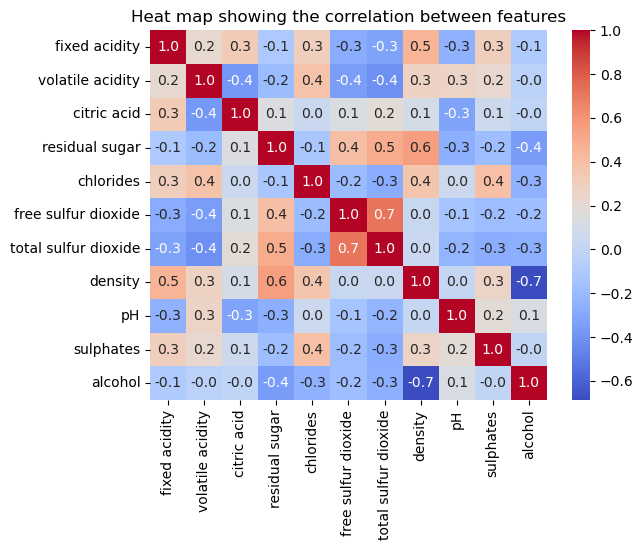

In [5]:
# Let us check the correleation between different features
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.drop("quality", axis = 1).corr() , cmap = 'coolwarm', annot= True, fmt =".1f") #you can use this to remove certain features and all (if you want to dive deeper)
plt.title("Heat map showing the correlation between features")
plt.show()

## Data Cleaning

In [6]:
# let us check for null and duplicate entries

print(df.isna().sum())
print()
print(df.duplicated().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

1179


In [7]:
#There are no null entries but there are 1179 duplicate values
df.drop_duplicates(inplace = True)

In [8]:
df.shape

(5318, 12)

In [9]:
# we want to classify the wine into high quality or low quality
#  as I feel this is the most important metric rather than the quality value

print(df["quality"].value_counts().sort_index())
df["high_low_quality"] = df["quality"].apply(lambda x: 1 if x>5 else 0) #1-5 low qaulity 5-9 high quality
print()
print(df["high_low_quality"].value_counts())

quality
3      30
4     206
5    1751
6    2323
7     855
8     148
9       5
Name: count, dtype: int64

high_low_quality
1    3331
0    1987
Name: count, dtype: int64


high_low_quality
1    3331
0    1987
Name: count, dtype: int64


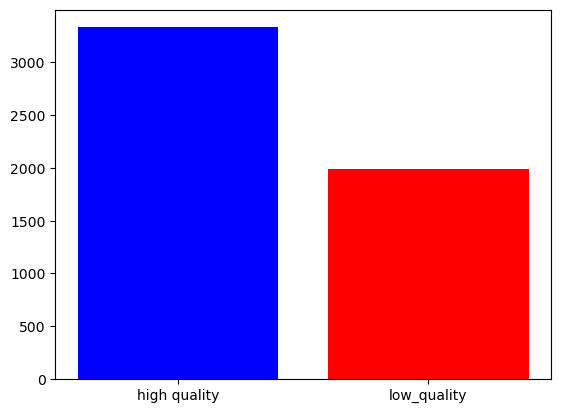

In [10]:
#bar graph showing the quality
print(df["high_low_quality"].value_counts())
plt.bar(["high quality", "low_quality"],df["high_low_quality"].value_counts().values, color = ['blue','red'])
plt.show() 

## Feature Selection and importing of ml libraries

In [11]:
#Feature selection
X= df.drop(columns = ["quality","high_low_quality"])
y = df["high_low_quality"] #target variable

#training of models
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


## Logistic regression model

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state = 2025)

#logisitic regression
logit_clf = LogisticRegression(max_iter= 2000)
logit_clf.fit(X_train, y_train) #train model
y_pred1 = logit_clf.predict(X_test)

#Evaluate model
print(f"The accuracy of the logistic regression model is {accuracy_score(y_test,y_pred1)}")
print(classification_report(y_test,y_pred1))


The accuracy of the logistic regression model is 0.7449874686716792
              precision    recall  f1-score   support

           0       0.67      0.62      0.64       593
           1       0.78      0.82      0.80      1003

    accuracy                           0.74      1596
   macro avg       0.73      0.72      0.72      1596
weighted avg       0.74      0.74      0.74      1596



## Decision Tree Classifier

In [13]:
dt_clf = DecisionTreeClassifier(random_state= 2025)
dt_clf.fit(X_train,y_train)
y_pred2 = dt_clf.predict(X_test)


print(accuracy_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

0.6829573934837093
              precision    recall  f1-score   support

           0       0.57      0.60      0.58       593
           1       0.75      0.73      0.74      1003

    accuracy                           0.68      1596
   macro avg       0.66      0.67      0.66      1596
weighted avg       0.69      0.68      0.68      1596

